Importing the libraries 

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from pylab import *
from numpy.random import seed

# Initializing the constant variables to reuse the values in the code and also setting the seed value to 27 
# to reproduce the same results

seed(27)
tf.random.set_seed(27)
random_state = 27
batch_size = 64
epochs = 15
num_classes = 5

In [2]:
#Importing Dataset
X_train = pd.read_csv('x_train.csv')
y_train_class = pd.read_csv('y_train.csv')
X_test = pd.read_csv('x_test.csv')
y_test_class = pd.read_csv('y_test.csv')

Printing the shape of the loaded train & test dataset files 

In [3]:
print('Shape of the labels of training data - ',X_train.shape)
print('Shape of the category of training data - ',y_train_class.shape)
print('Shape of the labels of test data - ',X_test.shape)
print('Shape of the category of test data - ',y_test_class.shape)

Shape of the labels of training data -  (60000, 784)
Shape of the category of training data -  (60000, 1)
Shape of the labels of test data -  (10000, 784)
Shape of the category of test data -  (10000, 1)


<b>Count plot for depicting the frequency of classes present in the MNIST dataset</b>

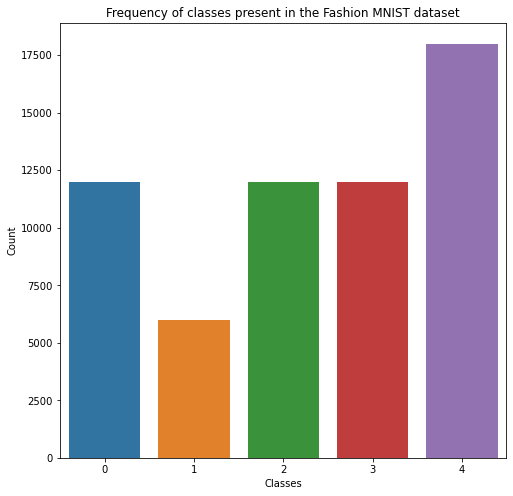

In [4]:
plt.figure(figsize = (8,8)) 
sns.countplot(x=y_train_class['0'])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Frequency of classes present in the Fashion MNIST dataset')
plt.show()

In [5]:
# Converting the pandas dataframe for the given dataset into numpy array and reshaping the training and testing labels
# to a size of 28*28 since each image is made up of 784 pixels

X_train_label = X_train.to_numpy().reshape(60000,28,28,1)
X_test_label = X_test.to_numpy().reshape(10000,28,28,1)

In [6]:
print('Shape of the labels of reshaped training data - ',X_train_label.shape)
print('Shape of the labels of reshaped test data - ',X_test_label.shape)

Shape of the labels of reshaped training data -  (60000, 28, 28, 1)
Shape of the labels of reshaped test data -  (10000, 28, 28, 1)


<b>From the above output, we can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.</b>

In [7]:
# Finding the unique number of classes present in the training data
classes = np.unique(y_train_class)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


<b>There's also a total of five output classes that range from 0 to 4.</b>

Text(0.5, 1.0, 'Test Image : 4')

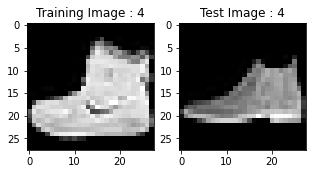

In [8]:
plt.figure(figsize=[5,5])

# Displaying the first image in training data
plt.subplot(1,2,1)
plt.imshow(X_train_label[0,:,:], cmap='gray')
plt.title("Training Image : {}".format(y_train_class['0'].iloc[0]))

# Displaying the first image in testing data
plt.subplot(1,2,2)
plt.imshow(X_test_label[0,:,:], cmap='gray')
plt.title("Test Image : {}".format(y_test_class['0'].iloc[0]))

<b>The output of above two image plots looks like an 'Ankle Boot', and this class is assigned a class label of 4.</b>

In [9]:
# Normalizing the training and test labels of the dataset between 0 and 1

X_train_normalized, X_test_normalized = X_train_label/255., X_test_label/255.

## [CM1] Default CNN model 

<b>The images are of size 28 x 28. We converted the image matrix to an array, rescaled it between 0 and 1, reshaped it so that it's of size 28 x 28 x 1, and fed it as an input to the network.</b>

We'll use three convolutional layers[[9]](#ref9):

1. The first layer will have <b>32 - 3 x 3 filters</b>,
2. The second layer will also have <b>32 - 3 x 3 filters</b> and
3. Both the layers have a <b>stride of 1, a padding size of (1,1) and ReLU activation functions</b>
4. The third layer will be a dense layer[[10]](#ref10)  to return the classification result with softmax activation function[[17]](#ref17)  of 5 units which is needed for the given <b>multi-class classification</b> problem.

In addition, there is one <b>max-pooling layer[[13]](#ref13) of size 2 x 2</b> and a <b>flatten layer[[15]](#ref15)</b> to convert the data into a 1-dimensional array for inputting it to the next layer.

In [10]:
#Defined the default model
model_default = tf.keras.models.Sequential([
   
    Conv2D(32,kernel_size=(3,3),activation='relu', padding = 'same', strides = 1,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    Conv2D(32,kernel_size=(3,3),activation='relu', padding = 'same', strides = 1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5,activation='softmax')
])

Metal device set to: Apple M1 Pro


2022-04-04 23:42:31.740523: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-04 23:42:31.740855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# Compiling the model created above using the optimizer as Adam and loss method as sparse categorical cross entropy due to multi-class problem
# Defining the metric as accuracy to determine the performance of the model

model_default.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


<b> Graphical representation of CM1 with different layers using plot_model[[16]](#ref16) function in keras</b>

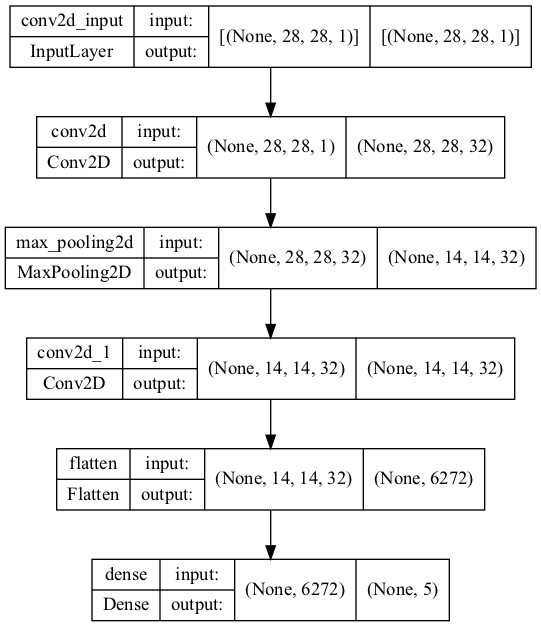

In [12]:
tf.keras.utils.plot_model(model_default, show_shapes=True)

Training the model for <b>15 epochs and batch size of 64</b>. By storing the result of the function in <b>model_def_fit</b>, we can use it later to plot the accuracy and loss function plots between training and validation which will help to analyze the model's performance visually.

In [13]:
# Fitting the default model on train dataset and splitting the training data into validation set(20%)
model_def_fit = model_default.fit(X_train_normalized,y_train_class,epochs=epochs,batch_size=batch_size,validation_split=0.2)


Epoch 1/15


2022-04-04 23:42:32.272406: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-04 23:42:32.513200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - ETA: 0s - loss: 0.4083 - accuracy: 0.8468

2022-04-04 23:42:36.368838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 5s 6ms/step - loss: 0.4083 - accuracy: 0.8468 - val_loss: 0.3217 - val_accuracy: 0.8842
Epoch 2/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2653 - accuracy: 0.9059 - val_loss: 0.2463 - val_accuracy: 0.9133
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2267 - accuracy: 0.9195 - val_loss: 0.2298 - val_accuracy: 0.9200
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2019 - accuracy: 0.9290 - val_loss: 0.2099 - val_accuracy: 0.9256
Epoch 5/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1835 - accuracy: 0.9355 - val_loss: 0.1973 - val_accuracy: 0.9312
Epoch 6/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1703 - accuracy: 0.9404 - val_loss: 0.1973 - val_accuracy: 0.9292
Epoch 7/15
750/750 [==============================] - 4s 6ms/step - loss: 0.1576 - accuracy: 0.9444 - val_loss: 0.1906 - val_accuracy: 0.9327
Epoch 8/15
750/75

<b>By observing the training accuracy and loss, we can say that the model did perform well, since after 15 epochs the training accuracy is 96.8% and the training loss is quite low(around 0.09). However the validation accuracy is a bit lower around 93.35% with validation loss of 0.1969.</b>

## [CM2] Hyperparameter tuned CNN neural network (Own network)

The characteristics of our model created are as below:

1. <b>3 convolutional layers[[9]](#ref9)</b> used to extract the various features from the input images. In this layer, the mathematical operation of convolution is performed between the input image and a filter of a particular size i.e <b>3*3</b> as in our case.
- The first layer will have <b>32 - 3 x 3 filters</b>,
- The second layer will have <b>64 - 3 x 3 filters</b> and
- The third layer will have <b>128 - 3 x 3 filters</b>

2. Pooling layers are added with the primary aim to decrease the size of the convolved feature map to reduce the computational costs. This is performed by decreasing the connections between layers and independently operating on each feature map.
- After every convolutional layer a <b>Max-pooling layer[[13]](#ref13)  of 2*2 dimension</b> is added

3. <b>4 fully connected layers(Dense)[[10]](#ref10) </b> are added after the input from the previous layers are flattened. The dense layers consists of the weights and biases along with the neurons and are used to connect the neurons between two different layers. These layers are usually placed before the output layer.
- The first dense layer is added with <b>256 neurons</b>
- The second dense layer is added with <b>128 neurons</b>
- The third dense layer is added with <b>64 neurons</b>
- The fourth dense layer is the output layer with <b>5 classes</b> and activation function as <b>'softmax'[[17]](#ref17) </b> to return the probabilties of all classes to occur

4. When all the features are connected to the fully connected layer, it can cause <b>overfitting</b> in the training dataset. To overcome this problem, a <b>dropout layer[[11]](#ref11) </b> is utilised wherein a few neurons are dropped from the neural network during training process resulting in reduced size of the model.
- Three layers with dropout of 0.25(25% reduction in the parameters to be trained) are added after the max-pooling layer and one after the fully connected layer.

5. Activation function <b>'ReLu'</b> is used to add <u>non-linearity</u> in the network and function <b>'softmax'</b> is used for <u>multi-class classification</u> in the final output layer.

<b>Defining the CM2 model for classification[[18]](#ref18)[[19]](#ref19)</b>

In [14]:
model_CM2 = tf.keras.models.Sequential()
model_CM2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1),padding='same'))
model_CM2.add(MaxPooling2D((2, 2),padding='same'))
model_CM2.add(Dropout(0.25))
model_CM2.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_CM2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_CM2.add(Dropout(0.25))
model_CM2.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model_CM2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_CM2.add(Dropout(0.25))
model_CM2.add(Flatten())
model_CM2.add(Dense(256, activation='relu'))
model_CM2.add(Dense(128, activation='relu'))
model_CM2.add(Dropout(0.25))
model_CM2.add(Dense(num_classes, activation='softmax'))

In [15]:
# Compiling the CM2 model using the adam optimizer and accuracy as the model metric
model_CM2.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

<b>Graphical representation of CM2 with various layers using plot_model[[16]](#ref16)</b>

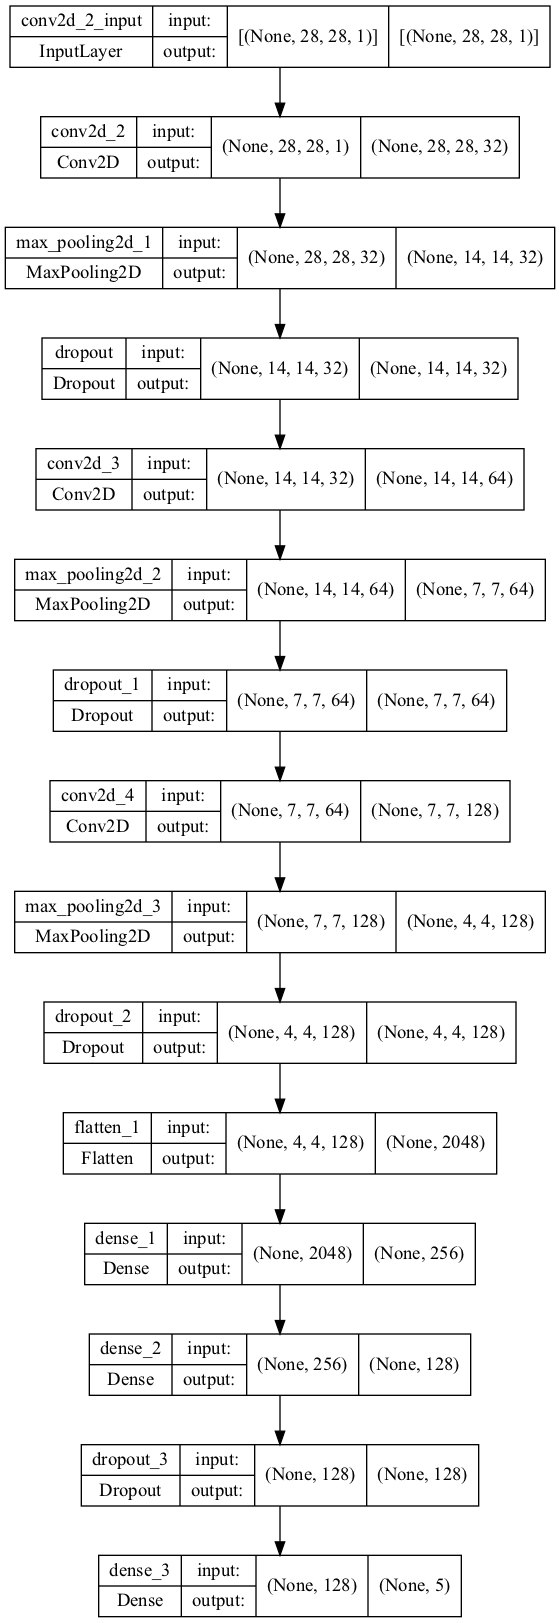

In [16]:
tf.keras.utils.plot_model(model_CM2, show_shapes=True)

In [17]:
#Fitting the CM2 model on train dataset and splitting the training data into validation set(20%)
model_CM2_fit = model_CM2.fit(X_train_normalized,y_train_class,epochs=epochs,batch_size=batch_size,validation_split=0.2)


Epoch 1/15
  1/750 [..............................] - ETA: 4:01 - loss: 1.6210 - accuracy: 0.2188

2022-04-04 23:43:35.577958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


749/750 [============================>.] - ETA: 0s - loss: 0.4600 - accuracy: 0.8170

2022-04-04 23:43:41.919776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 7s 9ms/step - loss: 0.4597 - accuracy: 0.8171 - val_loss: 0.2899 - val_accuracy: 0.8929
Epoch 2/15
750/750 [==============================] - 7s 9ms/step - loss: 0.2642 - accuracy: 0.9036 - val_loss: 0.2386 - val_accuracy: 0.9130
Epoch 3/15
750/750 [==============================] - 7s 9ms/step - loss: 0.2224 - accuracy: 0.9195 - val_loss: 0.1927 - val_accuracy: 0.9302
Epoch 4/15
750/750 [==============================] - 7s 9ms/step - loss: 0.1959 - accuracy: 0.9294 - val_loss: 0.1745 - val_accuracy: 0.9363
Epoch 5/15
750/750 [==============================] - 7s 9ms/step - loss: 0.1823 - accuracy: 0.9334 - val_loss: 0.1716 - val_accuracy: 0.9376
Epoch 6/15
750/750 [==============================] - 7s 9ms/step - loss: 0.1693 - accuracy: 0.9389 - val_loss: 0.1686 - val_accuracy: 0.9396
Epoch 7/15
750/750 [==============================] - 7s 9ms/step - loss: 0.1604 - accuracy: 0.9410 - val_loss: 0.1547 - val_accuracy: 0.9433
Epoch 8/15
750/75

<b>By observing the training accuracy and loss, we can say that the model did perform well, since after 15 epochs the training accuracy is 95.71% and the training loss is quite low(around 0.11). The validation accuracy is also similar around 94.8% with validation loss of 0.15.</b>

## [CM3] Result Analysis

### Performance of training and testing dataset

<b>Default Model (CM1) Evaluation on the test set</b>

In [18]:
model_default.evaluate(X_test_normalized,y_test_class)

313/313 [==============================] - 1s 4ms/step - loss: 0.2108 - accuracy: 0.9309


[0.21075774729251862, 0.9309000372886658]

<b>The testing accuracy is around 93.09% but with a bit higher test loss of around 0.21.</b>

<b>Predicting the class labels using default model CM1 - Classification Report[[8]](#ref8)</b>

In [19]:
y_pred_def = model_default.predict(X_test_normalized)
y_pred_classes_def = [np.argmax(element) for element in y_pred_def]

print('Classification Report :\n\n', classification_report(y_test_class,y_pred_classes_def))

2022-04-04 23:45:17.273216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Classification Report :

               precision    recall  f1-score   support

           0       0.89      0.90      0.89      2000
           1       0.99      0.98      0.98      1000
           2       0.92      0.92      0.92      2000
           3       0.97      0.97      0.97      2000
           4       0.92      0.92      0.92      3000

    accuracy                           0.93     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.93      0.93      0.93     10000



<b>From the above classification report of default model, we can observe that the class 1 has the highest precision, recall and f1-score i.e; 99%, 98% and 98% respectively whereas class 0 has the lowest precision of 89%. Also, class 0 has a low recall and f1 score of 90% and 89% respectively.</b>

<b>Confusion Matrix[[7]](#ref7) for predicted label vs true label - CM1</b>

Confusion matrix:
[[1795    1   81   14  109]
 [   0  977    0   17    6]
 [  79    0 1838    0   83]
 [  10    6    3 1945   36]
 [ 137    4   73   32 2754]]


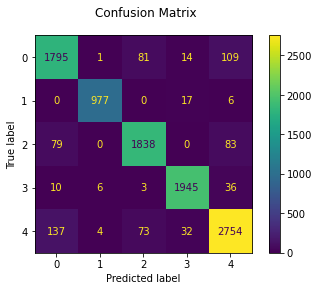

In [20]:
disp_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_pred_classes_def)
disp_matrix.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp_matrix.confusion_matrix}")

plt.show()

<b>From the above matrix we can see that the diagonal values with light colour are the classes that were predicted correctly i.e 9309 out of 10000 by the CM1 model whereas the other dark coloured(purple) values show the incorrect predictions i.e 691 classified by the model.</b>


<b>Model (CM2) Evaluation on the test set</b>

In [21]:
model_CM2.evaluate(X_test_normalized,y_test_class)

313/313 [==============================] - 1s 4ms/step - loss: 0.1688 - accuracy: 0.9448


[0.16875015199184418, 0.9448000192642212]

<b>The testing accuracy is around 94.77% that is an improvement from the default CM1 model and also lower test loss of around 0.17.</b>

<b>Predicting the class labels using model CM2 - Classification Report[[8]](#ref8)</b>

In [22]:
y_pred_CM2 = model_CM2.predict(X_test_normalized)
y_pred_CM2_classes = [np.argmax(element) for element in y_pred_CM2]

print('Classification Report :\n', classification_report(y_test_class,y_pred_CM2_classes))

2022-04-04 23:45:19.188339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      2000
           1       0.99      0.98      0.99      1000
           2       0.92      0.95      0.93      2000
           3       0.97      0.99      0.98      2000
           4       0.94      0.93      0.94      3000

    accuracy                           0.94     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.94      0.94      0.94     10000



<b>We can see that the classifier is performing good for all the classes since the values are greater than 90% for all accuracy metrics and overall accuracy of the predicted data is around 94% as compared to 93% in the default CM1 model.</b>

<b>Confusion Matrix[[7]](#ref7) for predicted label vs true label - CM2</b>

Confusion matrix:
[[1814    0   88   11   87]
 [   0  980    0   15    5]
 [  49    0 1892    1   58]
 [   4    1    4 1973   18]
 [ 101    5   64   41 2789]]


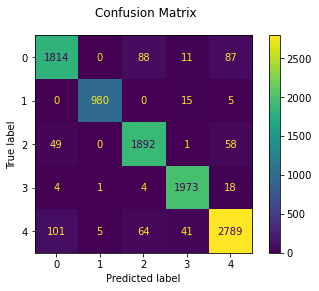

In [23]:
disp_CM2 = metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_pred_CM2_classes)
disp_CM2.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp_CM2.confusion_matrix}")
plt.show()

<b>From the above matrix for model CM2 we can see that the the classes that were predicted correctly i.e 9419 as compared to 9309 in the CM1 model whereas the incorrect predictions are 581 as compared to 691 as predicted by CM1 model.</b>

### Comparison of parameters defined for CM1 and CM2

In [24]:
# The summary of the model will show some parameters (weights and biases) in each layer 
#and also the total parameters in the model.
model_default.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 5)                 31365     
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
____________________________________________________

<b> The model defined above has the following characteristics:<br>
        1. Consists of 5 layers with the first layer as the input layer with dimensions 28X28 and 32 filters giving           the outshape shape as 28X28X32 that is fed to the pooling layer with filter of size 2X2.<br>
        2. The resulting shape from the pooling layer will be 14X14X32 since no parameters are trained during the             pooling operation hence the params as seen in the summary above do not change when passed to the pooling               layer.<br>
        3. The third layer is a convolution layer with the same specifications as the first layer and hence the number         of params increases to 9248 that need to be trained after they are processed by this convolution layer.<br>
        4. Next is the flattened layer[[15]](#ref15) converting the input into a 1-D array of size 6272 that can be fed to the fully connected or softmax output layer as in the case above for classification.<br>
        5. The last layer is a softmax layer[[17]](#ref17)  with 5 units as input to give the probability of 5 unique classes of the given FASHION MNIST dataset. </b>

In [25]:
# Visualizing the created layers using the summary() function which show some parameters (weights and biases) 
#in each layer and also the total parameters in our model - CM2

model_CM2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)         

<b>Based on the summary of the model above :<br> 
<b>1. The model consists of 14 layers.<br>
2. The first layer consists of an input image with dimensions of 28x28. It is convolved with 32 filters of size 3x3 resulting in dimension of 28x28x32. <br>
3. The second layer is a Pooling operation with filter size 2x2. Hence the resulting image dimension will be 14x14x32.<br> 
4. The third layer is a droput layer to reduce the number of neurons by 25% . <br>
5. The fourth layer also involves in a convolution operation with 64 filters of size 3x3 followed by a fifth pooling layer with similar filter size of 2x2.<br>
6. Thus, the resulting image dimension will be reduced to 7x7x64. Similar process is repeated to get the final reduced dimensions of the images as 4x4x128 in the eigth layer.</b><br>

<b>Once the image dimension is reduced, the ninth layer is a fully connected convolutional layer with 128 filters each of size 4x4. In this layer, each of the 256 units in this layer will be connected to the 2048 (4x4x128) units from the previous layers. The eleventh layer is also a fully connected layer with 128 units.</b>
    
<b>The final layer is a softmax output layer with ‘5’ possible classes based upon the number of classes in the dataset.</b>

### Plot of Accuracy and Loss for Training and Validation dataset for model CM2

/var/folders/73/xqj04zq51891k1sktqh7w0y80000gn/T/ipykernel_95491/2972085270.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo-', label='Training accuracy',color='magenta')
/var/folders/73/xqj04zq51891k1sktqh7w0y80000gn/T/ipykernel_95491/2972085270.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo-', label='Training loss',color='red')


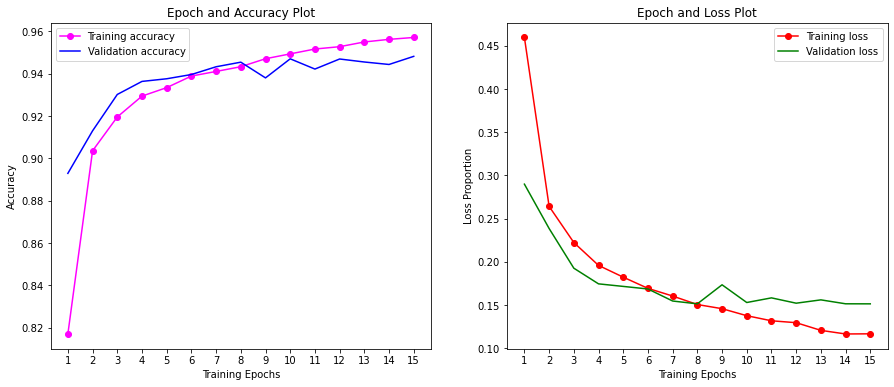

In [26]:
#Plotting the graphs

plt.figure(figsize=(15,6))

accuracy = model_CM2_fit.history['accuracy']
val_accuracy = model_CM2_fit.history['val_accuracy']
loss = model_CM2_fit.history['loss']
val_loss = model_CM2_fit.history['val_loss']
epochs = range(1,len(accuracy) + 1)

#1. Epoch vs Training Accuracy plot
subplot(1,2,1)
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy',color='magenta')
plt.plot(epochs, val_accuracy, 'b-', label='Validation accuracy')
plt.title('Epoch and Accuracy Plot')
plt.legend()
plt.xticks(epochs)
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')

#2.Epoch vs Loss plot
subplot(1,2,2)
plt.plot(epochs, loss, 'bo-', label='Training loss',color='red')
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Epoch and Loss Plot')
plt.legend()
plt.xticks(epochs)
plt.xlabel('Training Epochs')
plt.ylabel('Loss Proportion')

plt.show()

<b>Finally, we can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that our model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.</b>

<b>Therefore, we can say that our model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.</b>

## [CM4] Feature Extraction (Encoding)

In [27]:
# Extracting the intermediate layer from the CM2 model and applying the trained model on the test data to get 
# the features for visualization

layer_name=model_CM2.layers[11]._name
print(layer_name)
intermediate_layer_model = keras.Model(inputs=model_CM2.input,
                                       outputs=model_CM2.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(X_test_normalized)
intermediate_output

dense_2


<tf.Tensor: shape=(10000, 128), dtype=float32, numpy=
array([[0.        , 5.764292  , 0.        , ..., 1.9834129 , 0.7614268 ,
        0.        ],
       [0.        , 0.        , 0.24247275, ..., 0.        , 1.9730153 ,
        0.92544687],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.936102  ],
       ...,
       [5.3530073 , 0.        , 1.9209633 , ..., 2.9358985 , 5.526386  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.9801623 ],
       [2.478156  , 0.8164972 , 1.37749   , ..., 2.9428043 , 1.8694043 ,
        0.        ]], dtype=float32)>

In [28]:
#Shape of the features extracted from the CNN model CM2

print(intermediate_output.shape)

(10000, 128)


### Visualization using PCA

In [29]:
# Applying PCA to reduce the 64 dimensions of the features extracted to 2 dimensions to visualize 
# the cluster of output classes in two-dimesnional plane

pca_cm2 = PCA(n_components = 2,random_state=random_state)
output_pca = pca_cm2.fit_transform(intermediate_output)
output_pca

array([[-5.53565334,  1.29587239],
       [10.6001968 ,  0.18114329],
       [34.45703566,  6.07528321],
       ...,
       [-7.39517794,  2.35107856],
       [22.10668113,  2.90544451],
       [-5.70772838,  1.07308743]])

Text(0.5, 1.0, 'PCA plot with the first two components')

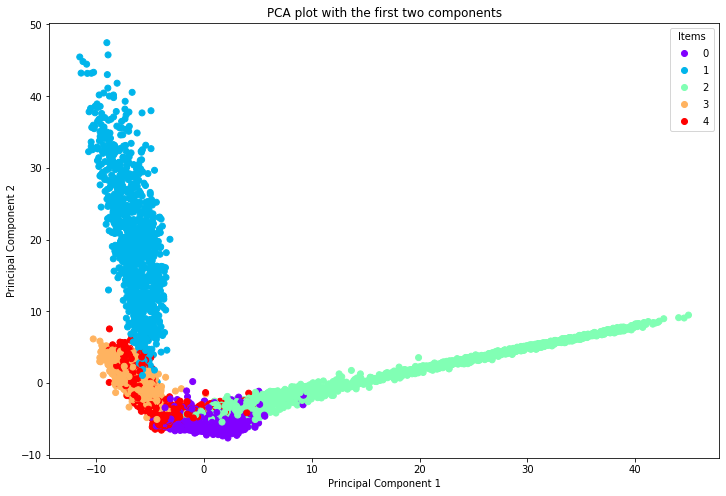

In [30]:
# Scatter plot with 5 different clusters as present in the mystery label

plt.figure(figsize=[12,8])

scatter_pca = plt.scatter(output_pca[:,0],output_pca[:,1],c=y_test_class.values,cmap='rainbow')
handles,labels= scatter_pca.legend_elements()
plt.legend(handles,labels,title='Items')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot with the first two components')

From the graph above, we can see the two components can separate different categories apart to some degree, but the separation is not clear enough. There is a lot of overlapping for classes 0,3 and 4 in the middle while the classes 1 and 2 are widely spread out.

### K-Means clustering visualization using PCA

In [31]:
#Performing K-means clustering with 5 clusters on the intermediate output
kmeans_cm2 = KMeans(n_clusters=5,random_state=random_state)
kmeans_model_pca = kmeans_cm2.fit(intermediate_output)
kmeans_labels_pca = kmeans_cm2.fit_predict(intermediate_output)

In [32]:
# Find the unique values from kmeans labels
np.unique(kmeans_labels_pca)

array([0, 1, 2, 3, 4], dtype=int32)

Text(0.5, 1.0, 'Visualizing PC1 vs PC2 for K-means')

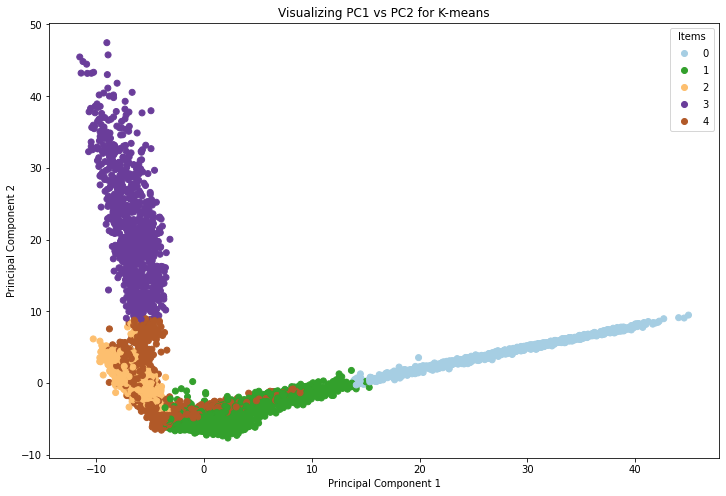

In [33]:
# Plotting the graph for visualizing the K-means clustering using PCA
plt.figure(figsize=[12,8])

scatter_pca = plt.scatter(output_pca[:,0],output_pca[:,1],c=kmeans_labels_pca,cmap='Paired')
handles,labels= scatter_pca.legend_elements()
plt.legend(handles,labels,title='Items')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualizing PC1 vs PC2 for K-means')

Performing K-means based on the output of PCA we can see that the clusters remain the same only the datapoints in each cluster are more visibly seperated displaying the distribution of datapoints for the given classes.

### Visualizing images of test data using results from K-Means

cluster 0


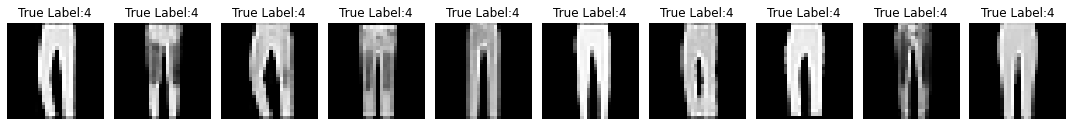

cluster 1


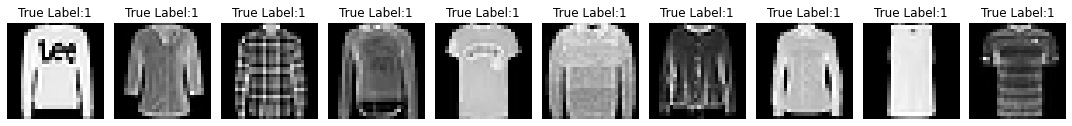

cluster 2


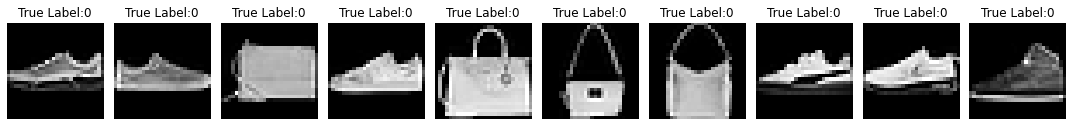

cluster 3


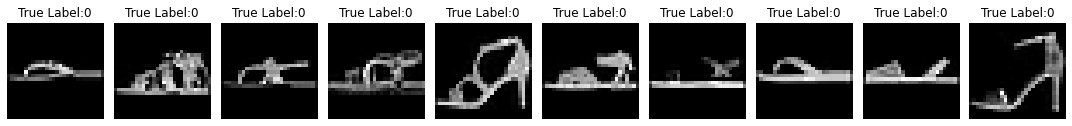

cluster 4


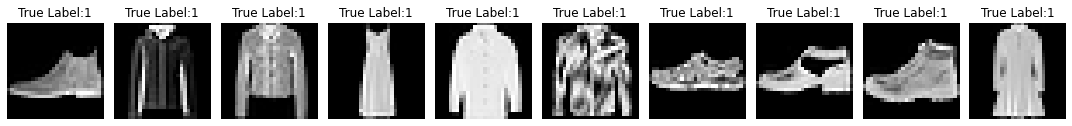

In [48]:
for i in range(0,5):

    row = np.where(kmeans_labels_pca==i)[0]  # row in kmeans_labels_pca for elements of cluster i
    num = np.random.choice(row, size=(10,))     #  number of elements for each cluster

    print("cluster "+str(i))
    
    plt.figure(figsize=(15,15))
    for k in range(len(num)):
        plt.subplot(1, 10, k+1)
        image = X_test_normalized[row[k], ]
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f"True Label:{kmeans_labels_pca[i]}")
        plt.tight_layout()
    plt.show()

From the results above, we can see that for different clusters created by K-Means the label values predicted are as shown above i.e cluster 0 has images with label as 4, cluster 1 has images with label as 1. Hence, the results from PCA have each cluster that contain values from multiple classes. Hence finding the mystery label based on the results from PCA is not feasible.

### DBSCAN clustering visualization using PCA

In [35]:
# Compute data proximity using Nearest Neighbours

neighbors = NearestNeighbors(n_neighbors=50)
neighbors_fit = neighbors.fit(intermediate_output)
distances, indices = neighbors_fit.kneighbors(intermediate_output)

Text(0.5, 1.0, 'K-distance - check where the elbow bends')

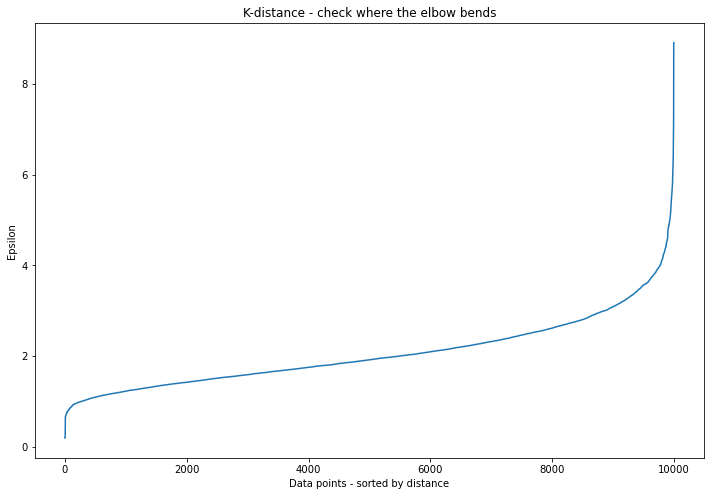

In [36]:
#Sorting and plot the distances between the data points
plt.figure(figsize=[12,8])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Data points - sorted by distance')
plt.ylabel('Epsilon')
plt.title('K-distance - check where the elbow bends')

<b>By Looking at the graph above we can see the main curvature is between 2 and 4. Taking 3 as the point between the extreme values of the curve we can now use this value for epsilon. The value for the number of samples needs some experimentation to see what gives the best fit.</b>

<b>Implementing the DBSCAN[[6]](#ref6) model</b>

In [37]:
dbscan_pca = DBSCAN(eps=3,min_samples=20)
dbscan_model_prediction = dbscan_pca.fit(intermediate_output)
dbscan_labels_pca = dbscan_pca.fit_predict(intermediate_output)

In [38]:
np.unique(dbscan_labels_pca)

array([-1,  0,  1,  2,  3,  4])

Text(0.5, 1.0, 'Visualizing PC1 and PC2 for DBSCAN')

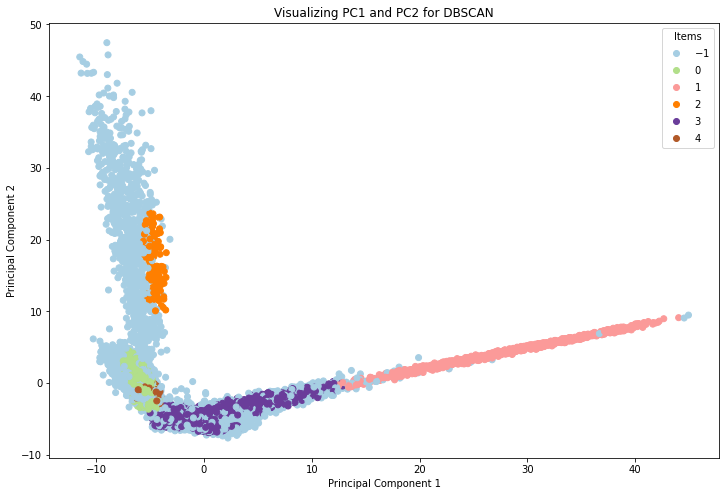

In [39]:
# Scatter plot for resulting clusters obtained from DBSCAN model

plt.figure(figsize=[12,8])

scatter_pca = plt.scatter(output_pca[:,0],output_pca[:,1],c=dbscan_labels_pca,cmap='Paired')
handles,labels= scatter_pca.legend_elements()
plt.legend(handles,labels,title='Items')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualizing PC1 and PC2 for DBSCAN')

The clusters in the above plot have maximum number of points for the classes we have as output in our dataset. The cluster labeled with -1 contains the outliers that is also considered as noise in the clustering algorithm. 

### Visualization using t-SNE

In [40]:
# Applying t-SNE with 2 components on the features extracted for our own designed model(CM2) 
tsne_cm2 = TSNE(n_components = 2,random_state=random_state)
output_tsne = tsne_cm2.fit_transform(intermediate_output)
output_tsne

/Users/sushantbatra/tensorflow-test/env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sushantbatra/tensorflow-test/env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  7.9497333,  65.20198  ],
       [-11.47585  , -79.10436  ],
       [ 33.80997  ,  59.233757 ],
       ...,
       [ -9.805926 ,  19.88865  ],
       [ 39.030167 ,  36.170746 ],
       [ 54.994686 ,  17.914757 ]], dtype=float32)

Text(0.5, 1.0, 'Plot of t-SNE with Component 1 and Component2')

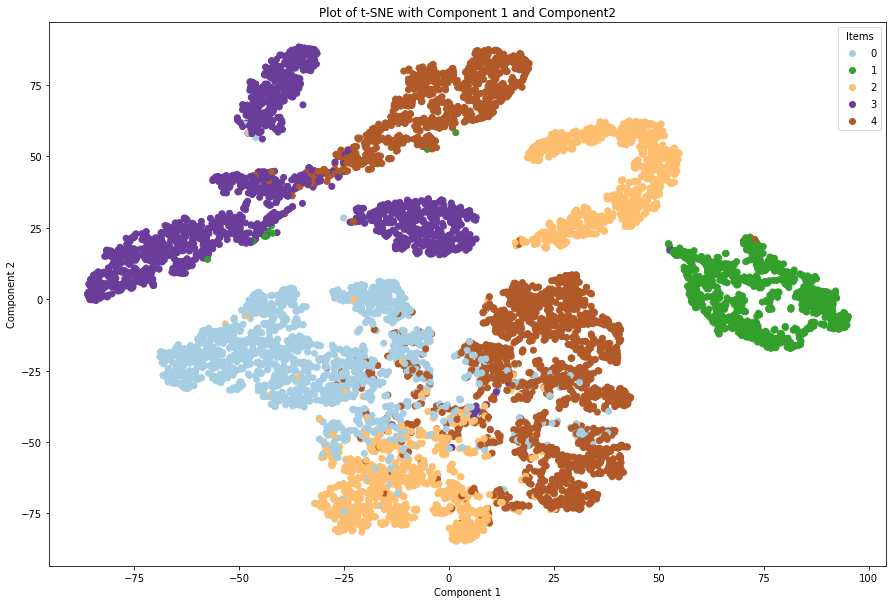

In [41]:
# Visualizing the results obtained after performing t-SNE
plt.figure(figsize=[15,10])

scatter_pca = plt.scatter(output_tsne[:,0],output_tsne[:,1],c=y_test_class.values,cmap='Paired')
handles,labels= scatter_pca.legend_elements()
plt.legend(handles,labels,title='Items')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Plot of t-SNE with Component 1 and Component2')

The clusters in the above plot are more clearly seperated as compared to PCA. Also the datapoints in each cluster are more clearly seperated. There is some overlapping in the clusters of 0,2 and 4 indicating similarity among them that can be used for prediction of the mystery label.

### K-Means clustering visualization using t-SNE

Text(0.5, 1.0, 'Visualization of K-means clustering using t-SNE')

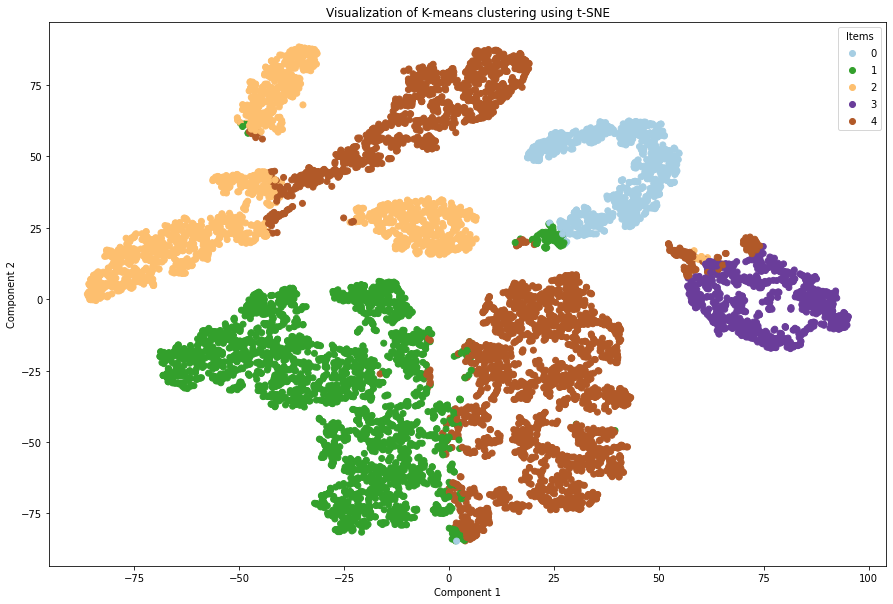

In [42]:
#Visualization of K-means clustering using t-SNE
plt.figure(figsize=[15,10])

scatter_pca = plt.scatter(output_tsne[:,0],output_tsne[:,1],c=kmeans_labels_pca,cmap='Paired')
handles,labels= scatter_pca.legend_elements()
plt.legend(handles,labels,title='Items')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Visualization of K-means clustering using t-SNE')

As we can see, t-SNE does a much better job of building nice clusters in 2D compared to raw PCA. This is because non-linear transformations are needed to project the initial 784-dimensional data into 2D successfully. Class 4 is widespread in the above graph.

### DBSCAN clustering visualization using t-SNE

Text(0.5, 1.0, 'Visualization of DBSCAN clustering using t-SNE')

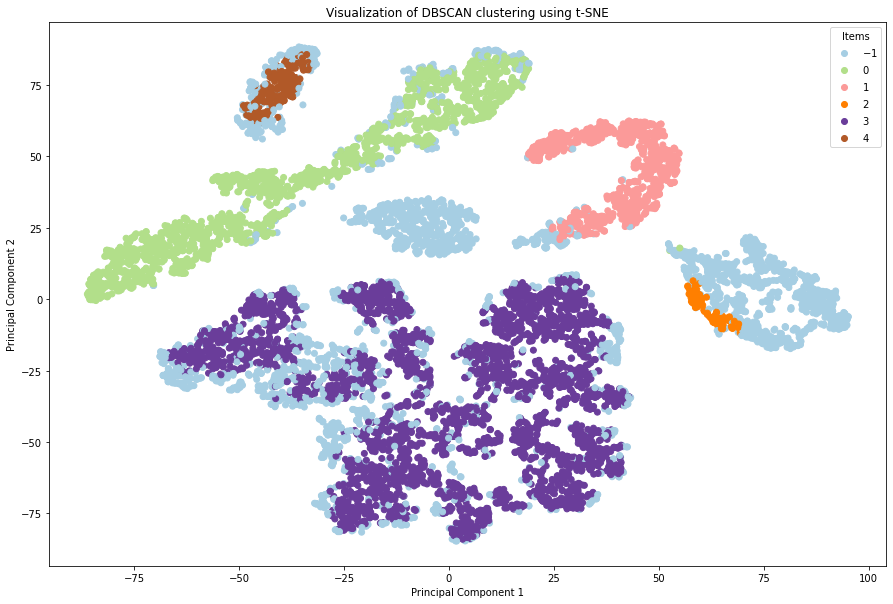

In [43]:
plt.figure(figsize=[15,10])

scatter_pca = plt.scatter(output_tsne[:,0],output_tsne[:,1],c=dbscan_labels_pca,cmap='Paired')
handles,labels= scatter_pca.legend_elements()
plt.legend(handles,labels,title='Items')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of DBSCAN clustering using t-SNE')

Basically DBSCAN algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.As per the graph, the class 0 is widely spread alongwith the overlapping of class -1 which is getting overlapped with all the present classes.

### Predicting the correct and incorrect labels and visualizing the results of clustering to find the mystery label [[12]](#ref12)

Found correct labels 9448


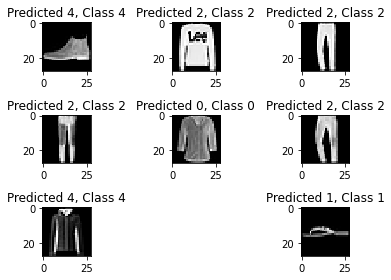

In [44]:
correct = np.where(y_pred_CM2_classes==y_test_class['0'])[0]
print("Found correct labels",len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test_label[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_CM2_classes[correct], y_test_class['0'].iloc[correct]))
    plt.tight_layout()

From the above image plots , we can observe that the labels mentioned above are predicted correctly , for instance the ankle boot and coat belonged to class 4 and they were predicted in class 4 only using our model.

Found incorrect labels 552


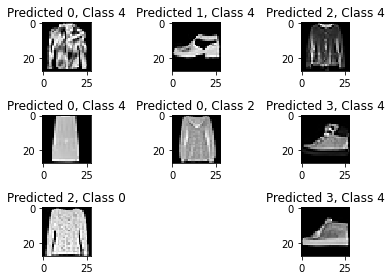

In [45]:
incorrect = np.where(y_pred_CM2_classes!=y_test_class['0'])[0]
print ("Found incorrect labels", len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test_label[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_CM2_classes[incorrect], y_test_class['0'].iloc[incorrect]))
    plt.tight_layout()

The above image plots shows few labels which were predicted incorrectly, for instance sneakers belonged to class 3 originally but as per the prediction it belonged to class 1 which is incorrect.

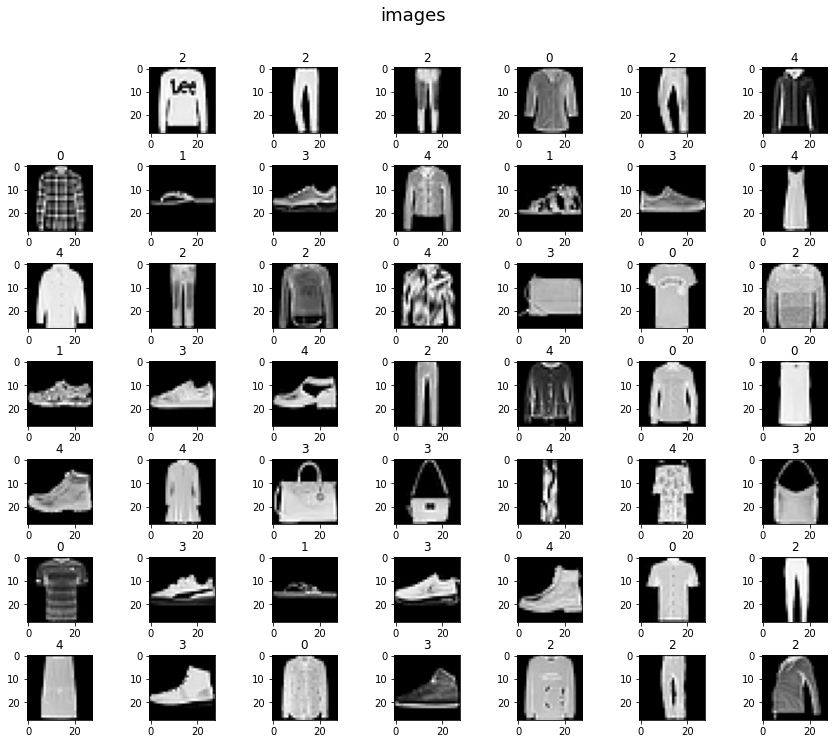

In [46]:
from PIL import Image
rows=7
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("images", fontsize=18, y=0.95)

for i in range(1,49):
  #print(i)
  #print(df_x_test[:i].shape)
  img=X_test.iloc[i].values.reshape((28,28,1))
  pil_img = tf.keras.preprocessing.image.array_to_img(img)
  plt.subplot(rows,7,i+1)
  plt.title(y_test_class['0'].iloc[i])
  plt.imshow(pil_img,cmap='gray')

<b> Based on the results of the clustering and also visualizing the images for the mystery label we can observe the following :<br>
    1. Category 0 : Shirts/T-Shirts/Top<br>
    2. Category 1 : Sandals/Slippers<br>
    3. Category 2 : Pullover/Trouser<br>
    4. Category 3 : Sneakers/Bags<br>
    5. Category 4 : Dress/Ankle Boots/Coat<br></b>

## REFERENCES:

[1]  https://seaborn.pydata.org/ <br>
[2]  https://numpy.org/ <br>
[3]  https://pandas.pydata.org/ <br>
[4]  https://scikit-learn.org/stable/ <br>
[5]  https://www.tensorflow.org/api_docs/python/tf/keras <br>
[6]  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html <br>
[7]  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html <br>
[8]  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html <br>
[9]  https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D <br>
[10] https://keras.io/api/layers/core_layers/dense/ <br>
[11] https://keras.io/api/layers/regularization_layers/dropout/ <br>
[12] https://pillow.readthedocs.io/en/stable/reference/Image.html <br>
[13] https://keras.io/api/layers/pooling_layers/max_pooling2d/ <br>
[14] https://keras.io/api/models/ <br>
[15] https://keras.io/api/layers/reshaping_layers/flatten/ <br>
[16] https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model <br>                                         [17] https://keras.io/api/layers/activation_layers/softmax/ <br> 
[18] https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python<br>
[19] https://www.kaggle.com/code/dejavu23/mnist-sklearn-and-keras/notebook<br>
                                                                